### PROPOSED CAPSTONE PROJECT -THE DATA INCUBATOR
#### NAME: Grace I. Ufeoshi
#### PROJECT TITLE: ANALYSIS AND PREDICTION OF DISEASE OUTBREAK  ACROSS THE GLOBE

### BACKGROUND
*According to the  World Health Organisation,a disease outbreak is the occurrence of cases of disease in excess of what normally should be expected in a defined community, geographical area or season. Over the years concerns is been raised by the populace whenever there is an epidemic of disease in a community, country or continent. Mortality rate increases and it affects growth and development in such communities. This work aims to address the prevalence of disease around the globe using machine learning approach. This will provide a platform for health experts and enthusiasts to identify which disease would affect a particular country and what season of the year it will occur. If a disease breakout is known or identified before occurence, the society, governments and general populace will be well prepared for it and combact it at its early stage before a complete breakout*

### MOTIVATION
To build a community free from diseases and to help the populace prepare early in the advent of an epidemic, i propose to develop a system that helps to identify trends based on existing data and make predictions of an occurrence of future diseases and also identify how the possibility of the effect of a spread to neighboring countries. 

### ANALYSIS TO BE PERFORMED
The following questions that will be addressed by this analysis are:
1.	What is driving multiple outbreak of diseases across the globe? Examples are Ebola, Lassa Fever, Cholera etc 
2.	Which location are they predominantly in.
3.	What time or season do they invade or are they likely to invade a particular territory?
4.	What can be done to prevent the spread of these diseases.

### APPROACH AND RESULT
I used a python library called beautiful soup to extract data of all diseases across all countries from 1996 - 2018. This data was obtained for the website of World Health Organisation. 

I carried out an exploratorty data analysis on these datasets by starting with data cleaning, to data visualization and data manipulation. I studied the features which are Name of disease, where it occurred and date of occurence. Also i had to manipulate the data to get desired resuts. In this work,, i used Ebola as a case study.

Dusing the course of the analysis the following were identified:

1. Comparing 49 diseases spread across 56 countries, the most prevelent out break is Middle East respiratory syndrome coronavirus (MERS-CoV), followed by Ebola and then Human infection with avian influenza A(H7N9) virus. 

2. The countries with the largest number of disease outbreak is Congo, China and Saudi Arabia. See Figure 1

3. Picking Ebola as a case study, it was observed from Figure 2, Ebola's outbreak season spans from  May to October, also the breakout is higher in May and August.

4. Similarly in Figure 3., Middle East respiratory syndrome coronavirus (MERS-CoV) occurs all year round with high breakout in April and June.


### Further work
1. Futher analysis will be carried out using classification algorithms to predict what disease will be prevalent at a particular time, in a specific country.
2. Also the dataset will be increased to include other factors that could contribute to the spread of a particular disease.
3. The system will be implemented as a web interface so that people can interact with it.

###### Data Sources
1. WHO: Emergency, Preparedness and Response http://www.who.int/csr/don/en/
2. Disease Outbreak by year http://www.who.int/csr/don/archive/year/2018/en/
3. Archive by Disease outbreak http://www.who.int/csr/don/archive/country/en/
4. Scraped data: https://github.com/IbukunGracey/TDI-Project.git

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
sns.set()

In [2]:
dis2018 = pd.read_excel("2018 diseases.xlsx")
dis2018.head()

,Date,Disease Name,Country
0,2018-10-25,Ebola virus,Congo
1,2018-10-18,Ebola virus,Congo
2,2018-10-15,Chikungunya,Sudan
3,2018-10-11,Ebola virus,Congo
4,2018-10-05,Cholera,Zimbabwe


In [7]:
dis2018Copy = dis2018.copy()

In [4]:
dis2017 = pd.read_excel("2010-2017 diseases.xlsx", sheet_name= '2017')

In [5]:
dis2017.head()

,Date,Disease Name,Country
0,2017-12-22,Middle East respiratory syndrome coronavirus (...,United Arab Emirate
1,2017-12-22,Outbreak of Salmonella Agona infections linked...,France
2,2017-12-22,Yellow fever,Nigeria
3,2017-12-22,Diphtheria,Yemen
4,2017-12-21,Monkeypox,Nigeria


In [9]:
dis2017Copy = dis2017.copy()

In [11]:
diseaseAll = pd.concat([dis2018Copy, dis2017Copy], axis =0)
diseaseAll.head()

,Date,Disease Name,Country
0,2018-10-25,Ebola virus,Congo
1,2018-10-18,Ebola virus,Congo
2,2018-10-15,Chikungunya,Sudan
3,2018-10-11,Ebola virus,Congo
4,2018-10-05,Cholera,Zimbabwe


In [83]:
dismap = diseaseAll.groupby("Country").count()

In [84]:
dismap = dismap.reset_index()
dismap.head()

,Country,Date,Disease Name
0,Africa,1,1
1,Algeria,1,1
2,Australia,1,1
3,Benin,1,1
4,Brazil,11,11


In [144]:
# Country Mostly affected by epidemics
diseaseAll.head()

,Date,Disease Name,Country
0,2018-10-25,Ebola virus,Congo
1,2018-10-18,Ebola virus,Congo
2,2018-10-15,Chikungunya,Sudan
3,2018-10-11,Ebola virus,Congo
4,2018-10-05,Cholera,Zimbabwe


### FIGURE 1: THE PREVALENCE OF DISEASES ACROSS 56 COUNTRIES

Text(91.25,0.5,'Disease Count')

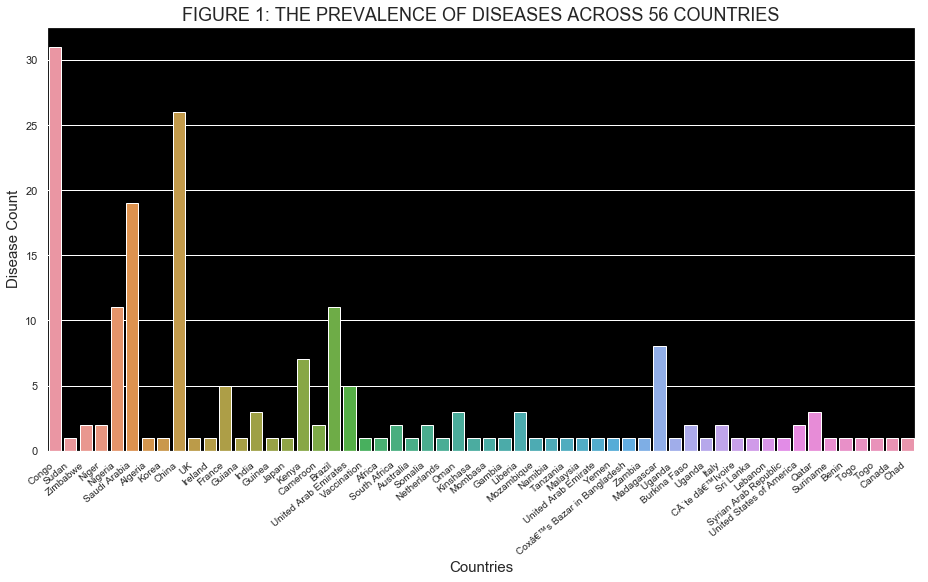

In [163]:
plt.figure(figsize=(13,8))
plt.rcParams["xtick.labelsize"] = 10
ax=plt.gca()
ax.set_facecolor("xkcd:black")
ax= sns.countplot(diseaseAll["Country"])
ax.set_xticklabels(ax.get_xticklabels(), rotation= 40, ha="right")
plt.tight_layout()
plt.title("FIGURE 1: THE PREVALENCE OF DISEASES ACROSS 56 COUNTRIES", fontsize= 18)
plt.xlabel("Countries", fontsize =15)
plt.ylabel("Disease Count", fontsize =15)

In [ ]:
dfDate.plot(figsize=(16,10), linewidth=3, fontsize=20)
ax=plt.gca()
ax.set_facecolor("xkcd:light green")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Difference between the Ethereum Coins(USD)", fontsize=15)
plt.title("COMPARISON OF ETHERUM OPEN, CLOSE, HIGH AND LOW PRICES OVER THE YEARS ", fontsize=20)

### Generating Choropleth Map For the frequency of diseases across the globe

In [97]:
import plotly.plotly as py
import plotly.tools as tls

In [74]:
tls.set_credentials_file(username="bidatagal", api_key="hvginfgvwe")

In [89]:
dismap["text"] = "Number of times disease Occured "+dismap["Date"].astype(str)+ " times"

In [138]:
data = [dict(type="choropleth", autocolorscale= False, location = dismap["Country"], z= dismap["Disease Name"],
        locationmode="country names", text= dismap["text"], colorscale = "Earth",
        colorbar = dict(title = "Disease Occurence numb"))]


In [117]:
# Creating layout dictionary
layout = dict(title="Frequency of diseases across the globe", geo=dict(scope="africa",
                    projection=dict(type ="africa"), showlakes= True, lakecolor ="rgb(66,165,245)",),)
layout

{'title': 'Frequency of diseases across the globe',
 'geo': {'scope': 'africa',
  'projection': {'type': 'africa'},
  'showlakes': True,
  'lakecolor': 'rgb(66,165,245)'}}

In [118]:
fig = dict(data=data, layout=layout)

In [139]:
py.iplot(fig, filename= "d3-choropleth-map")

In [15]:
#Number of Countries
diseaseAll.Country.nunique()

56

In [19]:
#Number of diseases
diseaseAll["Disease Name"].nunique()

49

In [141]:
#checking the number of countries affected by diseases 
diseaseAll["Country"].value_counts().head()

Congo           31
China           26
Saudi Arabia    19
Brazil          11
Nigeria         11
Name: Country, dtype: int64

In [22]:
#x =diseaseAll["Country"]
#sns.countplot(x)

In [23]:
type("Date")

str

In [24]:
diseaseAll["Date"] = pd.to_datetime(diseaseAll["Date"], format= '%Y/%m/%d')
diseaseAll["Date"].head(5)

0   2018-10-25
1   2018-10-18
2   2018-10-15
3   2018-10-11
4   2018-10-05
Name: Date, dtype: datetime64[ns]

In [26]:
diseaseAllCopy = diseaseAll.copy()

In [27]:
times = 'Year Month DayOfWeek'.split()
times

['Year', 'Month', 'DayOfWeek']

In [29]:
#Splitting the date column
diseaseAllCopy['Year'] = diseaseAllCopy["Date"].apply(lambda x: x.year)
diseaseAllCopy['Month'] = diseaseAllCopy["Date"].apply(lambda y: y.month)
diseaseAllCopy['DayOfWeek'] = diseaseAllCopy["Date"].apply(lambda z: z.dayofweek)
diseaseAllCopy[times].head(5)

,Year,Month,DayOfWeek
0,2018,10,3
1,2018,10,3
2,2018,10,0
3,2018,10,3
4,2018,10,4


In [30]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
diseaseAllCopy['DayOfWeek'] = diseaseAllCopy['DayOfWeek'].map(dmap)
diseaseAllCopy['DayOfWeek'].head()

0    Thu
1    Thu
2    Mon
3    Thu
4    Fri
Name: DayOfWeek, dtype: object

In [47]:
dmap2 = {1:'Jan', 2:'Feb',3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
         7:'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
diseaseAllCopy['Month'] = diseaseAllCopy['Month'].map(dmap2)
diseaseAllCopy['Month'].head()

0    Oct
1    Oct
2    Oct
3    Oct
4    Oct
Name: Month, dtype: object

In [48]:
diseaseAllCopy.head()

,Date,Disease Name,Country,Year,Month,DayOfWeek
0,2018-10-25,Ebola virus,Congo,2018,Oct,Thu
1,2018-10-18,Ebola virus,Congo,2018,Oct,Thu
2,2018-10-15,Chikungunya,Sudan,2018,Oct,Mon
3,2018-10-11,Ebola virus,Congo,2018,Oct,Thu
4,2018-10-05,Cholera,Zimbabwe,2018,Oct,Fri


In [49]:
ebolaFreq = diseaseAllCopy[diseaseAllCopy['Disease Name'] == "Ebola virus"]
ebolaFreq.head()

,Date,Disease Name,Country,Year,Month,DayOfWeek
0,2018-10-25,Ebola virus,Congo,2018,Oct,Thu
1,2018-10-18,Ebola virus,Congo,2018,Oct,Thu
3,2018-10-11,Ebola virus,Congo,2018,Oct,Thu
7,2018-10-04,Ebola virus,Congo,2018,Oct,Thu
9,2018-09-27,Ebola virus,Congo,2018,Sep,Thu


### FIGURE 2: The Occurence of Ebola Virus over the months across 56 countries around the globe

Text(0,0.5,'Disease Count')

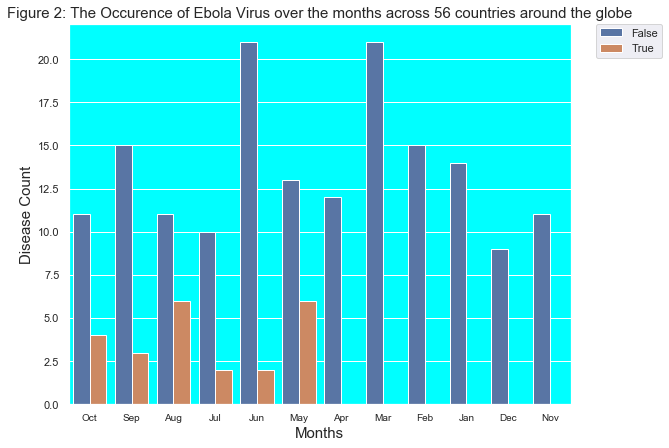

In [166]:
plt.figure(figsize=(9,7))
ax=plt.gca()
ax.set_facecolor("xkcd:cyan")
sns.countplot(diseaseAllCopy['Month'], hue=diseaseAllCopy['Disease Name'] == "Ebola virus")
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
plt.title("Figure 2: The Occurrence of Ebola Virus over the months across 56 countries around the globe", fontsize=15)
plt.xlabel("Months", fontsize =15)
plt.ylabel("Disease Count", fontsize =15)


### FIGURE 3: The Occurence of MERS-CoV over the months across 56 countries around the globe

Text(0.5,1,'Figure 3: The Occurence of MERS-CoV Virus over the months across 56 countries around the globe')

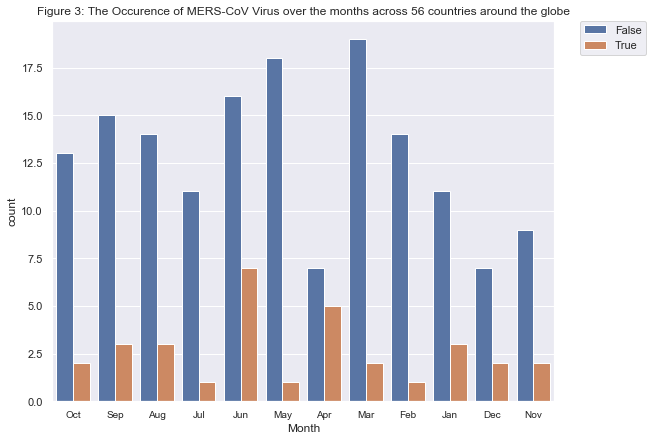

In [157]:
plt.figure(figsize=(9,7))
sns.countplot(diseaseAllCopy['Month'], hue=diseaseAllCopy['Disease Name'] ==
              "Middle East respiratory syndrome coronavirus (MERS-CoV)")
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
plt.title("Figure 3: The Occurence of MERS-CoV Virus over the months across 56 countries around the globe")

In [60]:
dDate = diseaseAllCopy.groupby("Date").count()

In [61]:
disDate = dDate.reset_index()
disDate.head()

,Date,Disease Name,Country,Year,Month,DayOfWeek
0,2017-01-03,1,1,1,1,1
1,2017-01-09,1,1,1,1,1
2,2017-01-13,1,1,1,1,1
3,2017-01-17,2,2,2,2,2
4,2017-01-18,1,1,1,1,1


Text(0.5,0,'Date')

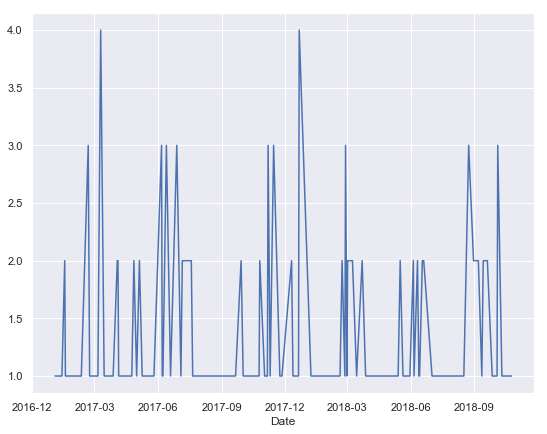

In [64]:
plt.figure(figsize=(9,7))
p =disDate["Date"]
q= disDate["Country"]
plt.plot(p,q)
#plt.ylim([100, 1000])
plt.xlabel("Date")

In [65]:
dis= diseaseAllCopy[["Date", "Disease Name"]]

In [68]:
u =  dis[ dis["Disease Name"] == "Middle East respiratory syndrome coronavirus (MERS-CoV)"]

In [69]:
dfM =u.groupby("Date").count()
dfM.head()

,Disease Name
Date,
2017-01-17,1
2017-01-26,1
2017-02-10,1
2017-03-10,1
2017-04-03,1


In [70]:
#Resseting index
dfM = dfM.reset_index()
dfM.head()

,Date,Disease Name
0,2017-01-17,1
1,2017-01-26,1
2,2017-02-10,1
3,2017-03-10,1
4,2017-04-03,1


In [167]:
diseaseAllCopy.head()

,Date,Disease Name,Country,Year,Month,DayOfWeek
0,2018-10-25,Ebola virus,Congo,2018,Oct,Thu
1,2018-10-18,Ebola virus,Congo,2018,Oct,Thu
2,2018-10-15,Chikungunya,Sudan,2018,Oct,Mon
3,2018-10-11,Ebola virus,Congo,2018,Oct,Thu
4,2018-10-05,Cholera,Zimbabwe,2018,Oct,Fri


In [133]:
dfstack = diseaseAllCopy.groupby(["DayOfWeek", "Month"]).count()
dfstack.head()

Date  Disease Name  Country  Year
DayOfWeek Month                                   
Fri       Apr       1             1        1     1
          Aug       8             8        8     8
          Dec       4             4        4     4
          Feb       2             2        2     2
          Jan       4             4        4     4

In [134]:
#Solution
dfSt = dfstack.unstack(level= 1)
dfSt["Disease Name"].head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
DayOfWeek,,,,,,,,,,,,
Fri,1.0,8.0,4.0,2.0,4.0,2.0,NaN,11.0,3.0,2.0,3.0,7.0
Mon,4.0,2.0,2.0,6.0,4.0,1.0,5.0,2.0,4.0,2.0,3.0,NaN
Sat,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Thu,3.0,2.0,1.0,3.0,1.0,2.0,2.0,5.0,5.0,1.0,6.0,4.0
